1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
2. Loop through the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
- Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
4. Build the city_url or endpoint for each city.
5. Log the URL and the record and set numbers.
6. Make an API request for each city.
7. Parse the JSON weather data for the following:
- City, country, and date
- Latitude and longitude
- Maximum temperature
- Humidity
- Cloudiness
- Wind speed
8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

56.71985252173056 -45.02044522324573
-32.908392144720615 162.24989945909954
3.5792005293773315 -65.38769998486273
68.01294895871197 151.55933639379145
-84.40377034253383 42.40806595297988
63.60884777654812 169.9960022004991
-4.308413735980523 -143.97815220913685
-57.17445543060295 133.84300374282697
-34.525055285415924 -107.82001924858224
36.51220321175431 36.97075173441422
-82.26079620093469 93.72966566431239
54.926814193295655 -77.61569564937207
18.048763910024732 40.04007513456784
15.620246100647236 103.59984932674905
83.32688437643353 -43.35525182890609
-61.79440226484313 163.19085018888774
50.192109417654905 -28.32898407085716
84.94703648318503 168.42372046095687
36.02559645614822 -89.04222291335125
-43.01952677877493 57.90487727932546
-8.044277682403816 -153.81235680069554
-42.0932689479352 67.3303588500616
-38.85690974435467 -47.6594413304386
39.289262828037664 -133.34096450531385
-1.8339643711605476 -71.26747057067057
-10.634627315515289 138.48243262643405
-72.85148215741715 -1

1.0663411649063192 152.63596400349422
60.49474081809916 -6.338220551861639
89.81538203766212 57.1210694100572
-17.858364802270955 35.274520833320054
89.75900295387223 34.97324479542107
16.137687070456764 176.1372931591177
26.68718789294755 -38.20439104264514
25.70864710557008 -6.998947489578114
3.9937894334755555 130.66556314241973
-20.661593558052033 -114.36355627939984
-6.473440616165789 75.6930568752675
12.801167388367574 137.88674470188926
82.02693993369462 23.58459640252252
9.948307322772948 66.1055983863809
-0.8202716068621783 110.59844021120614
-21.848425198354306 50.31520316936863
-37.00322305579826 178.1568034937656
40.2132170459208 -118.774241958819
49.44684892771812 142.60721597035666
-23.28644411813812 -123.10927731915496
18.793956836064723 163.11959476115567
-63.2410862098694 -35.74156657232476
-28.52150329985367 -109.54991759691295
-9.733844937679962 9.07316223832106
-80.82415761677055 107.70787186226846
87.35329784180064 -21.841693390305977
9.327749040179896 113.69679183

61.30783525450096 13.795256598967086
-59.30870871891227 -178.77555759865223
20.010785119412063 2.6661038660573126
-50.36201528617814 27.51917245651697
5.560361303347449 60.46640466437421
62.369810362434265 113.08003505610895
77.17846452022323 -42.76333925023977
12.95714808802721 35.46763645825331
-16.054346427297062 164.26760163345034
73.79032562341706 50.99236389635206
44.01131036542907 -6.260569589759399
48.85519406960657 -120.23485078638936
8.366197311744813 -166.45630987509398
33.17428166871821 69.08679741767537
25.271422886673946 -35.64175812807807
73.77690189264962 -96.86592155347131
-57.27935441037895 48.21000880075121
-20.88070781522569 -148.9416520271277
-85.15174893985278 -177.07909286385956
-37.33027840314359 75.72872923378873
12.112746831951497 96.67171103209216
65.56882563801116 -84.06773532750942
60.88309951976066 139.52887676936155
-48.095040266008716 -49.77387503841703
55.50984866013073 172.22769698144094
-68.62717030626438 -82.93983969868009
8.016076839869342 -160.3036

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | nanortalik
Processing Record 2 of Set 1 | port macquarie
Processing Record 3 of Set 1 | inirida
Processing Record 4 of Set 1 | srednekolymsk
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | kilis
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | moose factory
Processing Record 13 of Set 1 | tawkar
City not found. Skipping...
Processing Record 14 of Set 1 | suwannaphum
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | lagoa
Processing Record 18 of Set 1 | pevek
Processing Record 19 of Set 1 | humboldt
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | faanui
Processing Record 22 of Set 1 | souillac
Processing Rec

Processing Record 42 of Set 4 | nemuro
Processing Record 43 of Set 4 | kodiak
Processing Record 44 of Set 4 | isangel
Processing Record 45 of Set 4 | aromashevo
Processing Record 46 of Set 4 | gulariya
Processing Record 47 of Set 4 | sosnogorsk
Processing Record 48 of Set 4 | galveston
Processing Record 49 of Set 4 | llanes
Processing Record 50 of Set 4 | gangotri
City not found. Skipping...
Processing Record 1 of Set 5 | buala
Processing Record 2 of Set 5 | port keats
Processing Record 3 of Set 5 | karamea
City not found. Skipping...
Processing Record 4 of Set 5 | jamestown
Processing Record 5 of Set 5 | talara
Processing Record 6 of Set 5 | dubovyy umet
Processing Record 7 of Set 5 | mahebourg
Processing Record 8 of Set 5 | ulladulla
Processing Record 9 of Set 5 | bulgan
Processing Record 10 of Set 5 | gelemso
Processing Record 11 of Set 5 | sokoni
Processing Record 12 of Set 5 | cidreira
Processing Record 13 of Set 5 | marrakesh
Processing Record 14 of Set 5 | sola
Processing Record

Processing Record 31 of Set 8 | comodoro rivadavia
Processing Record 32 of Set 8 | grindavik
Processing Record 33 of Set 8 | beberibe
Processing Record 34 of Set 8 | marcona
City not found. Skipping...
Processing Record 35 of Set 8 | paragominas
Processing Record 36 of Set 8 | emerald
Processing Record 37 of Set 8 | chhachhrauli
Processing Record 38 of Set 8 | hamilton
Processing Record 39 of Set 8 | kruisfontein
Processing Record 40 of Set 8 | mubende
Processing Record 41 of Set 8 | richards bay
Processing Record 42 of Set 8 | yinchuan
Processing Record 43 of Set 8 | itatinga
Processing Record 44 of Set 8 | faya
Processing Record 45 of Set 8 | tiksi
Processing Record 46 of Set 8 | kerema
Processing Record 47 of Set 8 | baykit
Processing Record 48 of Set 8 | araouane
Processing Record 49 of Set 8 | mpika
Processing Record 50 of Set 8 | chimbarongo
Processing Record 1 of Set 9 | chancay
Processing Record 2 of Set 9 | gamboma
Processing Record 3 of Set 9 | bubaque
Processing Record 4 of 

Processing Record 17 of Set 12 | zeya
Processing Record 18 of Set 12 | vila franca do campo
Processing Record 19 of Set 12 | salta
Processing Record 20 of Set 12 | victoria point
Processing Record 21 of Set 12 | vikhorevka
Processing Record 22 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 23 of Set 12 | galgani
City not found. Skipping...
Processing Record 24 of Set 12 | jinchang
Processing Record 25 of Set 12 | xiongshi
City not found. Skipping...
Processing Record 26 of Set 12 | borama
City not found. Skipping...
Processing Record 27 of Set 12 | davis
Processing Record 28 of Set 12 | lubumbashi
Processing Record 29 of Set 12 | madison
Processing Record 30 of Set 12 | quatre cocos
Processing Record 31 of Set 12 | whitehorse
Processing Record 32 of Set 12 | rafai
Processing Record 33 of Set 12 | mareeba
Processing Record 34 of Set 12 | caldwell
Processing Record 35 of Set 12 | vila
Processing Record 36 of Set 12 | arzgir
Processing Record 37 of Set 12 | boffa
Pro

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nanortalik,60.1432,-45.2371,39.02,79,100,5.61,GL,2022-05-27 23:45:39
1,Port Macquarie,-31.4333,152.9167,62.89,72,37,3.83,AU,2022-05-27 23:45:40
2,Inirida,3.8653,-67.9239,73.08,97,81,2.51,CO,2022-05-27 23:45:40
3,Srednekolymsk,67.4500,153.6833,44.89,39,15,4.45,RU,2022-05-27 23:45:40
4,Port Alfred,-33.5906,26.8910,60.87,82,13,6.60,ZA,2022-05-27 23:45:41
...,...,...,...,...,...,...,...,...,...
560,Marsa Matruh,31.3525,27.2453,72.18,68,0,8.86,EG,2022-05-28 00:01:06
561,Kalinovskaya,43.5758,45.5192,54.68,74,3,3.11,RU,2022-05-28 00:01:07
562,Aklavik,68.2191,-135.0107,40.10,61,95,19.95,CA,2022-05-28 00:01:08
563,Vostok,46.4856,135.8833,51.03,91,100,0.45,RU,2022-05-27 23:57:59


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nanortalik,GL,2022-05-27 23:45:39,60.1432,-45.2371,39.02,79,100,5.61
1,Port Macquarie,AU,2022-05-27 23:45:40,-31.4333,152.9167,62.89,72,37,3.83
2,Inirida,CO,2022-05-27 23:45:40,3.8653,-67.9239,73.08,97,81,2.51
3,Srednekolymsk,RU,2022-05-27 23:45:40,67.4500,153.6833,44.89,39,15,4.45
4,Port Alfred,ZA,2022-05-27 23:45:41,-33.5906,26.8910,60.87,82,13,6.60
...,...,...,...,...,...,...,...,...,...
560,Marsa Matruh,EG,2022-05-28 00:01:06,31.3525,27.2453,72.18,68,0,8.86
561,Kalinovskaya,RU,2022-05-28 00:01:07,43.5758,45.5192,54.68,74,3,3.11
562,Aklavik,CA,2022-05-28 00:01:08,68.2191,-135.0107,40.10,61,95,19.95
563,Vostok,RU,2022-05-27 23:57:59,46.4856,135.8833,51.03,91,100,0.45


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'05/27/22'

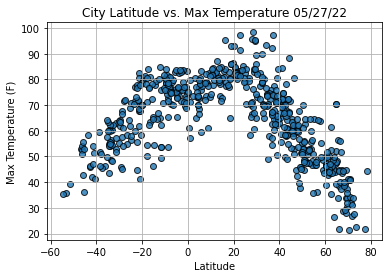

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

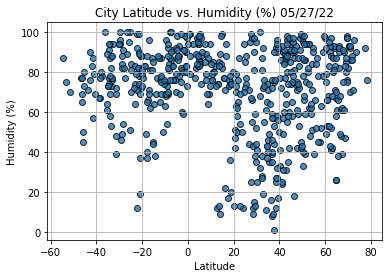

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

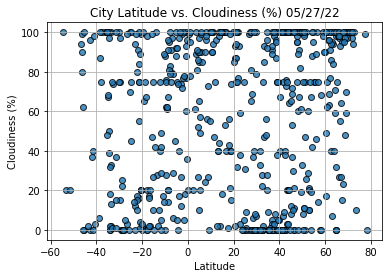

In [18]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

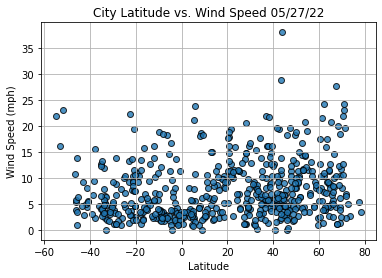

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [67]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    result = linregress(x_values, y_values)
    print(result.rvalue)

In [68]:
index13 = city_data_df.loc[13]
index13

City                        Bluff
Country                        NZ
Date          2022-05-27 23:45:44
Lat                         -46.6
Lng                      168.3333
Max Temp                    52.81
Humidity                       77
Cloudiness                     94
Wind Speed                  10.69
Name: 13, dtype: object

In [69]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
560     True
561     True
562     True
563     True
564     True
Name: Lat, Length: 565, dtype: bool

In [70]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nanortalik,GL,2022-05-27 23:45:39,60.1432,-45.2371,39.02,79,100,5.61
2,Inirida,CO,2022-05-27 23:45:40,3.8653,-67.9239,73.08,97,81,2.51
3,Srednekolymsk,RU,2022-05-27 23:45:40,67.4500,153.6833,44.89,39,15,4.45
8,Kilis,TR,2022-05-27 23:45:42,36.7161,37.1150,66.43,39,5,4.90
9,Albany,US,2022-05-27 23:44:19,42.6001,-73.9662,71.51,87,100,9.69
...,...,...,...,...,...,...,...,...,...
560,Marsa Matruh,EG,2022-05-28 00:01:06,31.3525,27.2453,72.18,68,0,8.86
561,Kalinovskaya,RU,2022-05-28 00:01:07,43.5758,45.5192,54.68,74,3,3.11
562,Aklavik,CA,2022-05-28 00:01:08,68.2191,-135.0107,40.10,61,95,19.95
563,Vostok,RU,2022-05-27 23:57:59,46.4856,135.8833,51.03,91,100,0.45


In [71]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nanortalik,GL,2022-05-27 23:45:39,60.1432,-45.2371,39.02,79,100,5.61
2,Inirida,CO,2022-05-27 23:45:40,3.8653,-67.9239,73.08,97,81,2.51
3,Srednekolymsk,RU,2022-05-27 23:45:40,67.4500,153.6833,44.89,39,15,4.45
8,Kilis,TR,2022-05-27 23:45:42,36.7161,37.1150,66.43,39,5,4.90
9,Albany,US,2022-05-27 23:44:19,42.6001,-73.9662,71.51,87,100,9.69


In [72]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

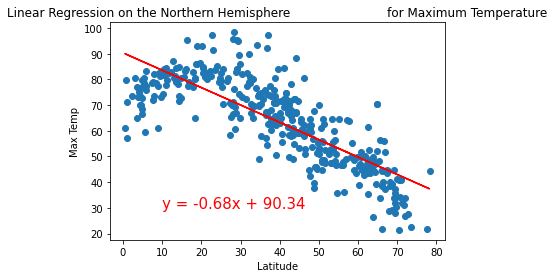

-0.7987268110624328


In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
northern_hemi_temp_regression = plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,30))

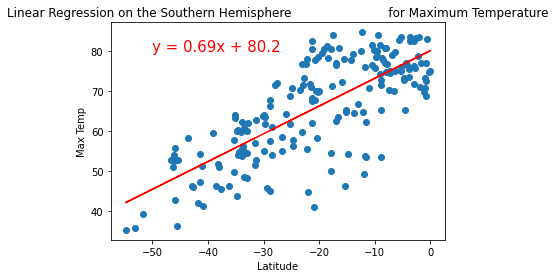

0.7571729038077728


In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

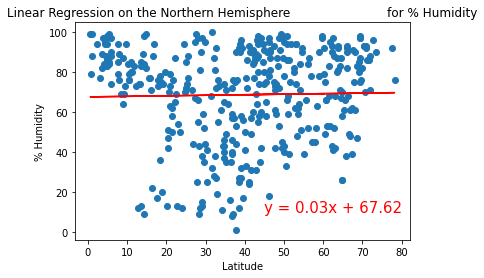

0.022291560670690335


In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

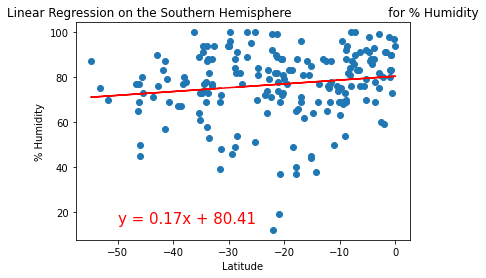

0.147602101735208


In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

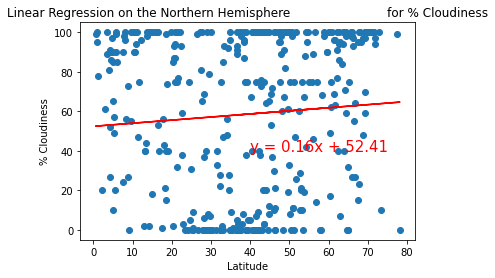

0.07767310097591464


In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,40))

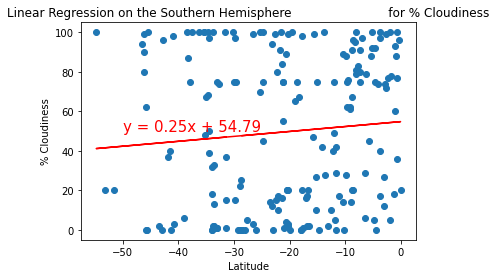

0.08796279765821295


In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,50))

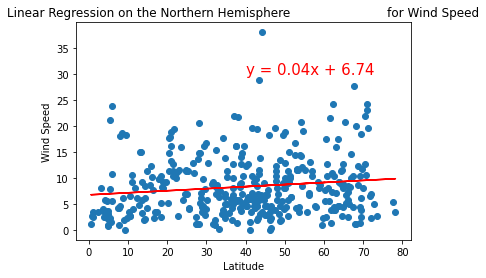

0.13650864561278422


In [87]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

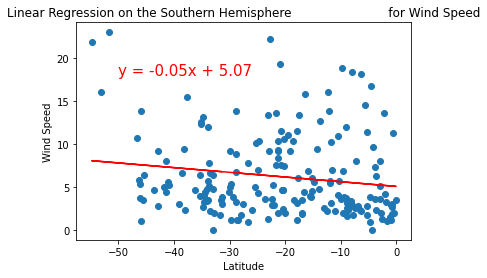

-0.15593815476032602


In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,18))